In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from patsy import dmatrices

plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus='False')

In [2]:
df = pd.read_csv('dataset/SeoulHourlyAvgAirPollution.csv')
df.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,201711242300,강남구,0.038,0.004,0.4,0.005,16.0,10.0
1,201711242200,강남구,0.031,0.008,0.4,0.005,17.0,9.0
2,201711242100,강남구,0.025,0.012,0.4,0.005,18.0,11.0
3,201711242000,강남구,0.033,0.007,0.4,0.005,21.0,12.0
4,201711241900,강남구,0.033,0.008,0.4,0.005,20.0,10.0


In [3]:
df = df.rename(columns={'미세먼지(㎍/㎥)':'미세먼지','초미세먼지(㎍/㎥)':'초미세먼지',
                  '이산화질소농도(ppm)':'이산화질소농도','오존농도(ppm)':'오존농도',
                  '일산화탄소농도(ppm)':'일산화탄소농도','아황산가스(ppm)':'아황산가스'})

In [4]:
df.head()

,측정일시,측정소명,이산화질소농도,오존농도,일산화탄소농도,아황산가스,미세먼지,초미세먼지
0,201711242300,강남구,0.038,0.004,0.4,0.005,16.0,10.0
1,201711242200,강남구,0.031,0.008,0.4,0.005,17.0,9.0
2,201711242100,강남구,0.025,0.012,0.4,0.005,18.0,11.0
3,201711242000,강남구,0.033,0.007,0.4,0.005,21.0,12.0
4,201711241900,강남구,0.033,0.008,0.4,0.005,20.0,10.0


In [5]:
df.isnull().sum()

측정일시        0
측정소명        0
이산화질소농도    38
오존농도       42
일산화탄소농도    42
아황산가스      38
미세먼지       59
초미세먼지      64
dtype: int64

In [6]:
model = smf.ols(formula='미세먼지 ~ 이산화질소농도+오존농도+일산화탄소농도+아황산가스',data=df)
model

In [7]:
result=model.fit()

In [8]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   미세먼지   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     324.7
Date:                Wed, 18 Nov 2020   Prob (F-statistic):          2.42e-243
Time:                        11:40:12   Log-Likelihood:                -18231.
No. Observations:                4146   AIC:                         3.647e+04
Df Residuals:                    4141   BIC:                         3.650e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.2163      1.879    -10.226      0.000     -22.900     -15.532
이산화질소농도      714.7309     41.964     17.032      0.000     632.459     797.003
오존농도        1125.8735     56.368     19.974      0.000    1015.362    1236.385
일산화탄소농도       24.8613      1.929     12.890      0.000      21.080      28.643
아황산가스       1307.4762    252.532      5.177      0.000     812.377    1802.575
==============================================================================
Omnibus:                     2935.593   Durbin-Watson:                   0.294
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            57348.515
Skew:                           3.170   Prob(JB):                         0.00
Kurtosis:                      20.082   Cond. No.                         954.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler=StandardScaler()

In [11]:
df.columns

Index(['측정일시', '측정소명', '이산화질소농도', '오존농도', '일산화탄소농도', '아황산가스', '미세먼지', '초미세먼지'], dtype='object')

In [12]:
df_scaler = scaler.fit_transform(df[['이산화질소농도', '오존농도', '일산화탄소농도', '아황산가스', '미세먼지', '초미세먼지']])

In [13]:
df_scaler = pd.DataFrame(df_scaler)
df_scaler


,0,1,2,3,4,5
0,0.577067,-0.987964,-0.679571,0.235791,-0.917703,-0.772231
1,0.132087,-0.570239,-0.679571,0.235791,-0.873421,-0.850373
2,-0.249325,-0.152515,-0.679571,0.235791,-0.829140,-0.694090
3,0.259224,-0.674671,-0.679571,0.235791,-0.696297,-0.615948
4,0.259224,-0.570239,-0.679571,0.235791,-0.740578,-0.772231
...,...,...,...,...,...,...
4220,-1.012148,0.996228,0.164570,1.002891,0.410733,1.415729
4221,-0.948579,0.891796,-0.257500,1.002891,-0.120641,0.399890
4222,-0.630736,0.474072,0.164570,1.002891,-0.032079,0.165466
4223,-0.757874,0.578503,-0.257500,1.002891,-0.076360,0.634315


In [44]:
df.isnull().sum()

측정일시        0
측정소명        0
이산화질소농도    38
오존농도       42
일산화탄소농도    42
아황산가스      38
미세먼지       59
초미세먼지      64
dtype: int64

In [46]:
df_drop = df.dropna()

In [14]:
df_scaler.columns=['이산화질소농도', '오존농도', '일산화탄소농도', '아황산가스', '미세먼지', '초미세먼지']

In [55]:
model3 = sm.OLS(df_drop[['미세먼지']],df_drop[['이산화질소농도', '오존농도', '일산화탄소농도', '아황산가스']])

In [56]:
result_drop = model3.fit()

In [57]:
result_drop.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   미세먼지   R-squared (uncentered):                   0.787
Model:                            OLS   Adj. R-squared (uncentered):              0.787
Method:                 Least Squares   F-statistic:                              3795.
Date:                Wed, 18 Nov 2020   Prob (F-statistic):                        0.00
Time:                        12:38:49   Log-Likelihood:                         -18164.
No. Observations:                4120   AIC:                                  3.634e+04
Df Residuals:                    4116   BIC:                                  3.636e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
이산화질소농도      464.1300     34.678     13.384      0.000     396.142     532.118
오존농도         676.9377     36.124     18.740      0.000     606.116     747.759
일산화탄소농도       24.3724      1.954     12.471      0.000      20.541      28.204
아황산가스        206.2672    230.958      0.893      0.372    -246.536     659.070
==============================================================================
Omnibus:                     2984.766   Durbin-Watson:                   0.281
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            57684.794
Skew:                           3.285   Prob(JB):                         0.00
Kurtosis:                      20.113   Cond. No.                         459.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
model2 = smf.ols(formula='미세먼지 ~ 이산화질소농도+오존농도+일산화탄소농도+아황산가스',data=df_drop)

In [53]:
df.columns

Index(['측정일시', '측정소명', '이산화질소농도', '오존농도', '일산화탄소농도', '아황산가스', '미세먼지', '초미세먼지'], dtype='object')

In [51]:
result2 =model2.fit()

In [52]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   미세먼지   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     320.6
Date:                Wed, 18 Nov 2020   Prob (F-statistic):          1.92e-240
Time:                        12:35:36   Log-Likelihood:                -18114.
No. Observations:                4120   AIC:                         3.624e+04
Df Residuals:                    4115   BIC:                         3.627e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.9641      1.885    -10.059      0.000     -22.660     -15.268
이산화질소농도      710.0743     42.093     16.869      0.000     627.549     792.600
오존농도        1118.3266     56.563     19.771      0.000    1007.432    1229.221
일산화탄소농도       24.8749      1.932     12.878      0.000      21.088      28.662
아황산가스       1297.6219    252.677      5.135      0.000     802.238    1793.005
==============================================================================
Omnibus:                     2923.061   Durbin-Watson:                   0.297
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            57484.204
Skew:                           3.176   Prob(JB):                         0.00
Kurtosis:                      20.161   Cond. No.                         952.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
dfcorr = df.corr()

In [19]:
dfcorr

,측정일시,이산화질소농도,오존농도,일산화탄소농도,아황산가스,미세먼지,초미세먼지
측정일시,1.000000,0.242065,-0.303619,0.049956,0.022536,-0.108031,-0.131000
이산화질소농도,0.242065,1.000000,-0.819829,0.718849,0.301045,0.318941,0.449399
오존농도,-0.303619,-0.819829,1.000000,-0.530129,-0.199801,-0.085580,-0.243590
일산화탄소농도,0.049956,0.718849,-0.530129,1.000000,0.369479,0.394767,0.511726
아황산가스,0.022536,0.301045,-0.199801,0.369479,1.000000,0.227818,0.178054
미세먼지,-0.108031,0.318941,-0.085580,0.394767,0.227818,1.000000,0.749026
초미세먼지,-0.131000,0.449399,-0.243590,0.511726,0.178054,0.749026,1.000000


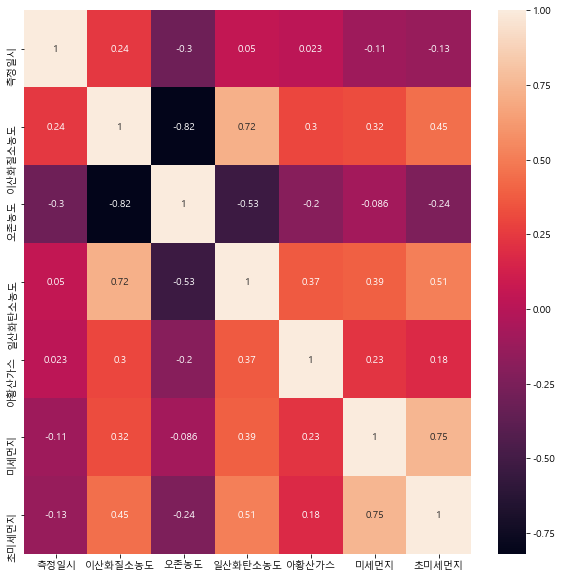

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(dfcorr,annot=True,)

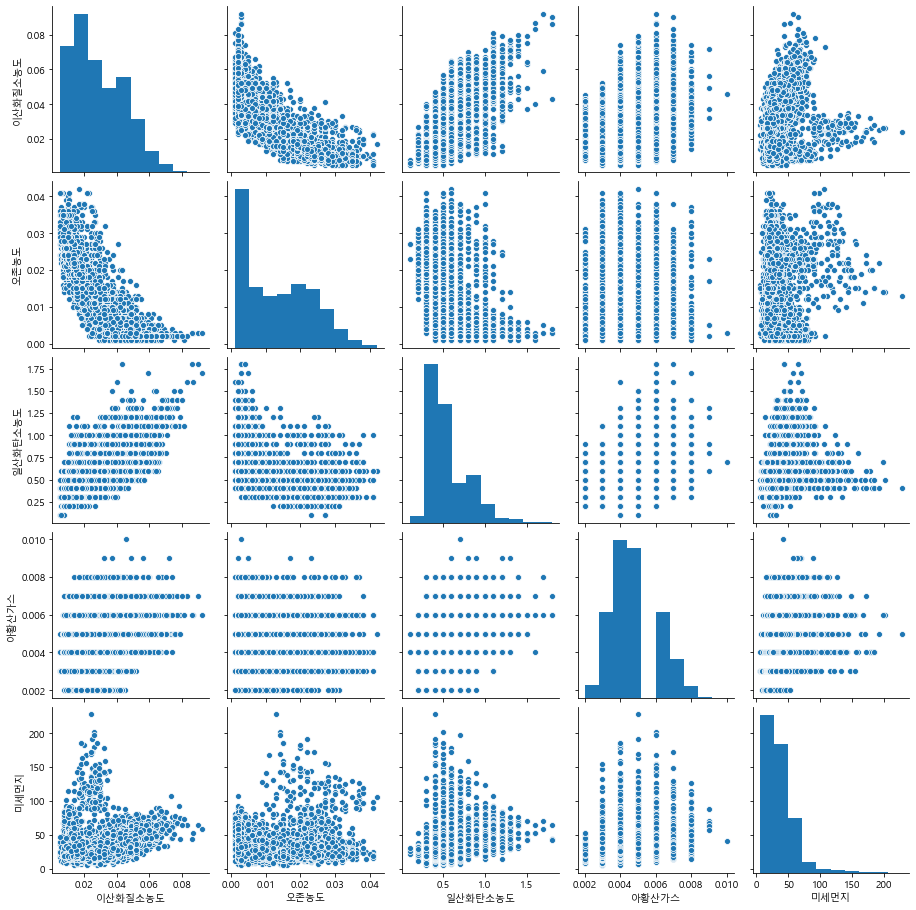

In [21]:
sns.pairplot(df[['이산화질소농도', '오존농도', '일산화탄소농도', '아황산가스', '미세먼지']]);

In [22]:
y, X = dmatrices('미세먼지 ~ 이산화질소농도+오존농도+일산화탄소농도+아황산가스', df, return_type = 'dataframe')

In [23]:
vif=pd.DataFrame()

(다중)공선성의 진단

분산팽창계수(VIF, Variance Inflation Factor)를 구하여 판단

엄밀한 기준은 없으나 보통 10보다 크면 다중공선성이 있다고 판단(5를 기준으로 하기도 함)

In [24]:
vif['vif factor'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['features']=X.columns
vif

,vif factor,features
0,37.853982,Intercept
1,4.681110,이산화질소농도
2,3.128357,오존농도
3,2.240400,일산화탄소농도
4,1.165939,아황산가스


In [25]:
df

,측정일시,측정소명,이산화질소농도,오존농도,일산화탄소농도,아황산가스,미세먼지,초미세먼지
0,201711242300,강남구,0.038,0.004,0.4,0.005,16.0,10.0
1,201711242200,강남구,0.031,0.008,0.4,0.005,17.0,9.0
2,201711242100,강남구,0.025,0.012,0.4,0.005,18.0,11.0
3,201711242000,강남구,0.033,0.007,0.4,0.005,21.0,12.0
4,201711241900,강남구,0.033,0.008,0.4,0.005,20.0,10.0
...,...,...,...,...,...,...,...,...
4220,201711180300,중랑구,0.013,0.023,0.6,0.006,46.0,38.0
4221,201711180200,중랑구,0.014,0.022,0.5,0.006,34.0,25.0
4222,201711180100,중랑구,0.019,0.018,0.6,0.006,36.0,22.0
4223,201711180000,중랑구,0.017,0.019,0.5,0.006,35.0,28.0


In [38]:
df_small = df[:200]

In [39]:
lm = smf.ols(formula='미세먼지 ~ 이산화질소농도+오존농도+일산화탄소농도+아황산가스',data=df_small)

In [40]:
result_small = lm.fit()
result_small.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   미세먼지   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     36.42
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           1.14e-22
Time:                        11:45:48   Log-Likelihood:                -809.44
No. Observations:                 198   AIC:                             1629.
Df Residuals:                     193   BIC:                             1645.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -53.3549      9.198     -5.801      0.000     -71.497     -35.213
이산화질소농도      249.3824    206.546      1.207      0.229    -157.994     656.759
오존농도        1215.1023    355.958      3.414      0.001     513.036    1917.169
일산화탄소농도       83.0066     13.136      6.319      0.000      57.097     108.916
아황산가스       5062.3557   1296.597      3.904      0.000    2505.037    7619.675
==============================================================================
Omnibus:                      184.583   Durbin-Watson:                   0.509
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3725.490
Skew:                           3.547   Prob(JB):                         0.00
Kurtosis:                      23.031   Cond. No.                     1.39e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
df_small

,측정일시,측정소명,이산화질소농도,오존농도,일산화탄소농도,아황산가스,미세먼지,초미세먼지
0,201711242300,강남구,0.038,0.004,0.4,0.005,16.0,10.0
1,201711242200,강남구,0.031,0.008,0.4,0.005,17.0,9.0
2,201711242100,강남구,0.025,0.012,0.4,0.005,18.0,11.0
3,201711242000,강남구,0.033,0.007,0.4,0.005,21.0,12.0
4,201711241900,강남구,0.033,0.008,0.4,0.005,20.0,10.0
...,...,...,...,...,...,...,...,...
3995,201711201100,중구,0.039,0.009,0.7,0.004,34.0,20.0
3996,201711201000,중구,0.041,0.007,0.8,0.004,33.0,20.0
3997,201711200900,중구,0.042,0.004,0.7,0.004,33.0,18.0
3998,201711200800,중구,0.043,0.003,0.7,0.004,25.0,14.0


In [34]:
df

,측정일시,측정소명,이산화질소농도,오존농도,일산화탄소농도,아황산가스,미세먼지,초미세먼지
0,201711242300,강남구,0.038,0.004,0.4,0.005,16.0,10.0
1,201711242200,강남구,0.031,0.008,0.4,0.005,17.0,9.0
2,201711242100,강남구,0.025,0.012,0.4,0.005,18.0,11.0
3,201711242000,강남구,0.033,0.007,0.4,0.005,21.0,12.0
4,201711241900,강남구,0.033,0.008,0.4,0.005,20.0,10.0
...,...,...,...,...,...,...,...,...
4220,201711180300,중랑구,0.013,0.023,0.6,0.006,46.0,38.0
4221,201711180200,중랑구,0.014,0.022,0.5,0.006,34.0,25.0
4222,201711180100,중랑구,0.019,0.018,0.6,0.006,36.0,22.0
4223,201711180000,중랑구,0.017,0.019,0.5,0.006,35.0,28.0
